In [1]:
import matplotlib.pyplot as plt

import numpy as np

from timescales.conversions import convert_knee

from timescales.sim import (sim_spikes_synaptic, sim_spikes_prob, sim_synaptic_kernel,
    sample_spikes, bin_spikes, sim_branching, sim_ou)

from timescales.plts import set_default_rc
set_default_rc()

# 04. Simulations

This tutorial explores simulating timescales in spikes trains and local feild potentials. Spike trains are simulated from sampling a probability distribution of exponential decaying kernels. LFPs are simulated using stochastic processes, namely Ornstein-Ulhenbeck and branching processes.

## Spikes

Spike probabilties are simulated using the convolution of a synaptic kernel with a Poisson point process, drawn from an exponential distribution. The mean of the exponential distribution and refractory period may be specified as keyword arguments to determine the Poisson process. The synaptic kernel

In [2]:
# Settings
n_seconds = 2
fs = 10000
tau = convert_knee(10)
times = np.arange(0, n_seconds, 1/fs)

# Simulate Spikes
spikes = sim_spikes_synaptic(n_seconds, fs, tau, mu=500, refract=500)

In [3]:
# The above simulation call is broken down below:
np.random.seed(0)

# Define the kernel with an instantaneous rise and decay defined by tau
kernel = sim_synaptic_kernel(10 * tau, fs, 0, tau)

# Define spiking probability
probs = sim_spikes_prob(n_seconds, fs, kernel, mu=500, refract=50)

# Sample spikes from probabiltiies
spikes = sample_spikes(probs)

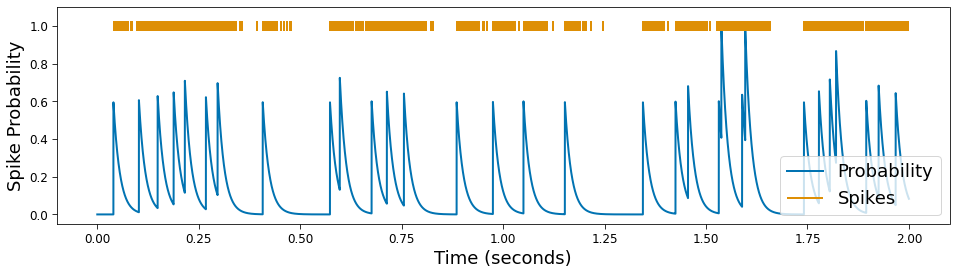

In [4]:
# Plot
plt.figure(figsize=(16, 4))
plt.plot(times, probs, label='Probability')
plt.eventplot(times[np.where(spikes)[0]], linelengths=.05,
              lineoffsets=1., color='C1', label='Spikes')
plt.xlabel('Time (seconds)')
plt.ylabel('Spike Probability')
plt.legend(loc='lower right');

### Spike Binning

Binary spikes may binned to approximate the probability distribution they were sampled from. This processes reduces the sampling rate by a factor of the bin size, lowering the nyquist frequency. This is acceptable as timescales are not expected to be found close to the nyquist when working the binary spiking arrays. Increasing the sampling rate allows for smaller bins and a smoother probability estimate.

In [5]:
# Simulate
bin_size = 50
spikes_bin, fs_bin = bin_spikes(spikes, fs, bin_size)
times_bin = np.arange(0, n_seconds, 1/fs_bin)

Text(0.5, 1.0, 'Binned Spikes')

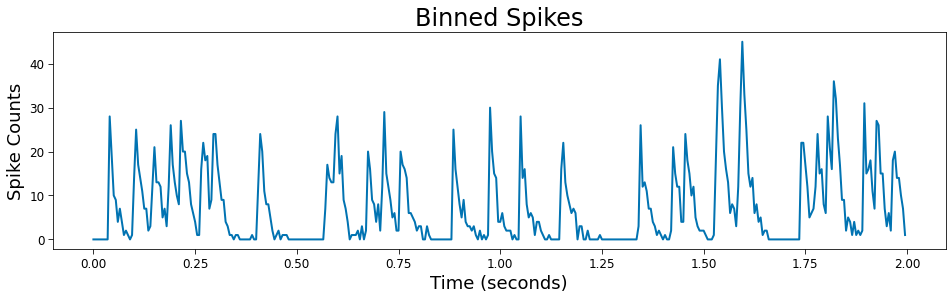

In [6]:
# Plot
plt.figure(figsize=(16, 4))
plt.plot(times_bin, spikes_bin)
plt.xlabel('Time (seconds)')
plt.ylabel('Spike Counts')
plt.title('Binned Spikes')

## LFPs

The timescales module also supports simulating local feild potentials using Ornstein-Uhlenbeck and branching processes.

In [7]:
# Simulate
fs = 1000
sig_branching = sim_branching(n_seconds, fs, tau, 10, mean=0, variance=1)
sig_ou = sim_ou(n_seconds, fs, tau, mean=0, variance=1)

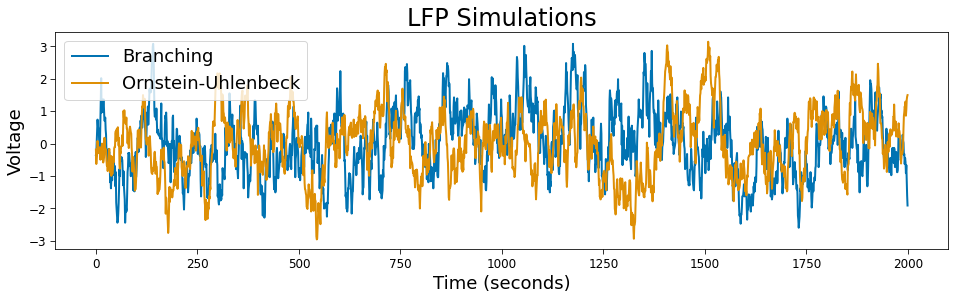

In [8]:
# Plot
plt.figure(figsize=(16, 4))

plt.plot(sig_branching, label='Branching')
plt.plot(sig_ou, label='Ornstein-Uhlenbeck')

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')

plt.title('LFP Simulations')
plt.legend();